Powered by: Muhammed KAYA
---------------------------

Dosyalar

0 - .ipynb_checkpoints
1 - 12.06.2024 EKİPLER - C BÖLGESİ.xlsx
2 - C BÖLGESİ GEÇ ÇIKIŞ_ DR MELEK  .xlsx
3 - EKİPLER - C BÖLGESİ Genel Bakış.xlsx
4 - late_exit.bat
5 - late_exit_automated.py
6 - Untitled.ipynb




Lütfen Excel Dosya Numarasını Giriniz:  2


C BÖLGESİ GEÇ ÇIKIŞ_ DR MELEK  .xlsx

Günler:  12.06.2024, 16.06.2024, 20.06.2024, 24.06.2024, 28.06.2024, 02.07.2024 



Lütfen Görüntülemek istediğiniz Günü Yazınız (Toplam Veriyi Görüntülemek İçin X Tuşuna Basınız):  x


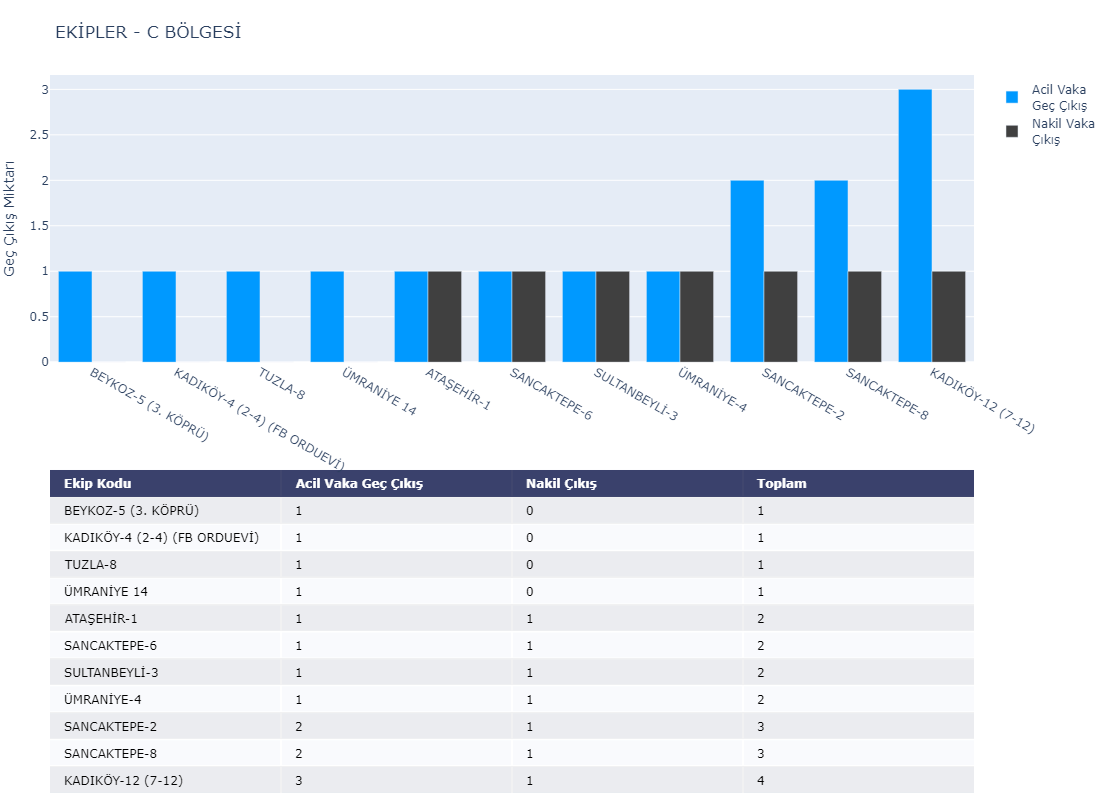

In [3]:
%run late_exit_automated.py

In [4]:
# %load late_exit_automated.py
def late_exit():

  """
  WRITTEN BY: Muhammed KAYA - kayamui
  Created by using a specific excel file to calculate the number of the late exits of Medical Teams.
  The file has many sheets to parse and for arranging columns starting from iloc[1] and drops unnecessary rows.
  """

  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

  import seaborn  as sns
  import plotly.graph_objects as go
  import plotly.figure_factory as ff

  import warnings
  warnings.filterwarnings('ignore')

  import os


  def bring_header(writer):
    #Header
    print(f"Powered by: {writer}\n---------------------------\n") #{arrange_files()['data_frames'][list(arrange_files()['data_frames'].keys())[0]].columns[0]}

    return visualize()


  def sheetPath():
    os_files = {}

    for index, item in enumerate(os.listdir()):
        os_files[index] = item

    print("Dosyalar\n")

    for file in os_files:
        print(f"{file} - {os_files[file]}")
    print("\n")

    index = int(input('Lütfen Excel Dosya Numarasını Giriniz: '))
    try:
        sheetpath = os_files[index]
        print(os_files[index])
        for root, dirs, files in os.walk(os.getcwd()):
            if sheetpath in files:
                
                sheetpath =  os.path.join(root, sheetpath)
                
            #print("Dosya Uzantısı: ",sheetpath)
            return sheetpath
    except:
        print('\nGeçersiz Dosya Numarası...\n')


  def arrange_files():

    try:
      excel_file = pd.ExcelFile(sheetPath())
      sheet_names = excel_file.sheet_names
      data_frames = {}
      merged_df = pd.DataFrame()

      # Loop through each sheet and read it into a DataFrame

      for sheet in sheet_names:
        data_frames[sheet] = excel_file.parse(sheet)
        data_frames[sheet].columns = data_frames[sheet].iloc[1]
        data_frames[sheet] = data_frames[sheet].iloc[2:]

      #data_frames[list(data_frames.keys())[0]].columns[0] brings the first column's name which being used for sort values by the team code
      for i in range(len(list(data_frames.keys()))):
        merged_df = pd.concat([merged_df, data_frames[list(data_frames.keys())[i]]], ignore_index=True)


      #A specific folder to concat all the days and groups them to calculate total late exits for later.
      merged_df = merged_df.groupby(data_frames[list(data_frames.keys())[0]].columns[0]).agg({'EKİP TOP.':'sum', 'NAKİL TOPLAM': 'sum'}).reset_index().sort_values(by = 'EKİP TOP.', ascending = True).reset_index(drop = True)
      merged_df = merged_df[(merged_df["EKİP TOP."] > 0) | (merged_df["NAKİL TOPLAM"] > 0)].sort_values(by = ["EKİP TOP.", "NAKİL TOPLAM",data_frames[list(data_frames.keys())[0]].columns[0] ], ascending = False).reset_index(drop = True)
      merged_df['Toplam'] = merged_df['EKİP TOP.'] + merged_df['NAKİL TOPLAM']

      file_directories = {'excel_file' : excel_file, 'sheet_names':sheet_names, 'data_frames': data_frames,'merged_df':merged_df}

      return file_directories

    except:
      print('\nGeçersiz Dosya...\n')
      return arrange_files()



  def visualize():
    """
    Takes the sheet name as input and prints the graph.
    """

    file_directories = arrange_files()

    data_frames = file_directories['data_frames']
    merged_df = file_directories['merged_df']
    excel_file = file_directories['excel_file']
    sheet_names = file_directories['sheet_names']

    def bring_dates():

      #print sheet names
      print(f'\nGünler: ', ', '.join(list(data_frames.keys())),"\n" )

      a = str(input('Lütfen Görüntülemek istediğiniz Günü Yazınız (Toplam Veriyi Görüntülemek İçin X Tuşuna Basınız): '))


      #The statement uses merged_df for total calculations
      if a.upper() == 'X':

        merged_df.to_excel(f"{data_frames[list(data_frames.keys())[0]].columns[0]} Genel Bakış.xlsx")

        data = merged_df[(merged_df["EKİP TOP."] > 0) | (merged_df["NAKİL TOPLAM"] > 0)].sort_values(by = ["EKİP TOP.", "NAKİL TOPLAM",data_frames[list(data_frames.keys())[0]].columns[0] ], ascending = True).reset_index(drop = True)

        # Add table data
        table_data = [['Ekip Kodu', 'Acil Vaka Geç Çıkış', 'Nakil Çıkış', 'Toplam']]
        for i in range(len(data)):
          table_data.append([data[data_frames[list(data_frames.keys())[0]].columns[0]][i], data['EKİP TOP.'][i], data['NAKİL TOPLAM'][i], data['EKİP TOP.'][i] + data['NAKİL TOPLAM'][i]])

        # Initialize a figure with ff.create_table(table_data)
        fig = ff.create_table(table_data, height_constant=60)

        # Add graph data
        teams = data[data.columns[0]]
        GFPG = data['EKİP TOP.']
        GAPG = data['NAKİL TOPLAM']

        # Make traces for graph
        trace1 = go.Bar(x=teams, y=GFPG, xaxis='x2', yaxis='y2',
                        marker=dict(color='#0099ff'),
                        name='Acil Vaka<br>Geç Çıkış')
        trace2 = go.Bar(x=teams, y=GAPG, xaxis='x2', yaxis='y2',
                        marker=dict(color='#404040'),
                        name='Nakil Vaka<br>Çıkış')

        # Add trace data to figure
        fig.add_traces([trace1, trace2])

        # initialize xaxis2 and yaxis2
        fig['layout']['xaxis2'] = {}
        fig['layout']['yaxis2'] = {}

        # Edit layout for subplots
        fig.layout.yaxis.update({'domain': [0, .45]})
        fig.layout.yaxis2.update({'domain': [.6, 1]})

        # The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
        fig.layout.yaxis2.update({'anchor': 'x2'})
        fig.layout.xaxis2.update({'anchor': 'y2'})
        fig.layout.yaxis2.update({'title': 'Geç Çıkış Miktarı'})

        # Update the margins to add a title and see graph x-labels.
        fig.layout.margin.update({'t':75, 'l':50})
        fig.layout.update({'title': f'{data_frames[list(data_frames.keys())[0]].columns[0]}'})

        # Update the height because adding a graph vertically will interact with
        # the plot height calculated for the table
        fig.layout.update({'height':800})

        # Plot!
        fig.show()


      #If you input only one sheet name, this statement works
      else:
        try:
          #initialize input data
          data = data_frames[a]
          data = data[(data['EKİP TOP.'] > 0) | (data['NAKİL TOPLAM'] > 0)].sort_values(by = ['EKİP TOP.', 'NAKİL TOPLAM', data_frames[list(data_frames.keys())[0]].columns[0]] , ascending = True).reset_index(drop = True)
          data['EK DURUMLAR (ANONS VERMEME, HASTANE İSTEMEME, YEMEK İÇİN BÖLGE DIŞINA ÇIKMA, YOL UZATMA VS.)'].fillna('Mevcut Değil', inplace = True)

          data.to_excel(f"{a} {data_frames[list(data_frames.keys())[0]].columns[0]}.xlsx")
          #print(data.columns)

          # Add table data
          table_data = [['Ekip Kodu', 'Acil Vaka Geç Çıkış', 'Nakil Vaka Çıkış', 'Toplam']]
          for i in range(len(data)):
            table_data.append([data[data.columns[0]][i], data['EKİP TOP.'][i], data['NAKİL TOPLAM'][i], data['EKİP TOP.'][i] + data['NAKİL TOPLAM'][i]])

          # Initialize a figure with ff.create_table(table_data)
          fig = ff.create_table(table_data, height_constant=60)

          # Add graph data
          teams = data[data.columns[0]]
          GFPG = data['EKİP TOP.']
          GAPG = data['NAKİL TOPLAM']

          # Make traces for graph
          trace1 = go.Bar(x=teams, y=GFPG, xaxis='x2', yaxis='y2',
                          marker=dict(color='#0099ff'),
                          name='Acil Vaka<br>Geç Çıkış')
          trace2 = go.Bar(x=teams, y=GAPG, xaxis='x2', yaxis='y2',
                          marker=dict(color='#404040'),
                          name='Nakil Vaka<br>Çıkış')

          # Add trace data to figure
          fig.add_traces([trace1, trace2])

          # initialize xaxis2 and yaxis2
          fig['layout']['xaxis2'] = {}
          fig['layout']['yaxis2'] = {}

          # Edit layout for subplots
          fig.layout.yaxis.update({'domain': [0, .45]})
          fig.layout.yaxis2.update({'domain': [.6, 1]})

          # The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
          fig.layout.yaxis2.update({'anchor': 'x2'})
          fig.layout.xaxis2.update({'anchor': 'y2'})
          fig.layout.yaxis2.update({'title': 'Geç Çıkış Miktarı'})

          # Update the margins to add a title and see graph x-labels.
          fig.layout.margin.update({'t':75, 'l':50})
          fig.layout.update({'title': f'{data_frames[list(data_frames.keys())[0]].columns[0]}'})

          # Update the height because adding a graph vertically will interact with
          # the plot height calculated for the table
          fig.layout.update({'height':800})

          # Plot!
          fig.show()

        except:

          print('\nGeçersiz Gün Adı...\n')
          return bring_dates()

    return bring_dates()

  return bring_header('Muhammed KAYA')


late_exit()